<a href="https://colab.research.google.com/github/Nasuz092/Dataset-Twitter/blob/main/Arcane/Sentimen_Analisis_Arcane_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROSES CLEANSING DATA**

In [1]:
!pip install nltk

In [25]:
#import modul
import pandas as pd
import numpy as np
import regex as re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Nasuz092/Dataset-Twitter/refs/heads/main/Arc_Ekko_Jinx.csv', sep=';')
df .head(3)

conversation_id_str                      created_at  favorite_count  \
0         1,85973E+18  Thu Nov 21 22:27:56 +0000 2024               9   
1         1,85775E+18  Sat Nov 16 11:42:53 +0000 2024            1035   
2         1,85861E+18  Mon Nov 18 20:51:13 +0000 2024              15   

                                           full_text       id_str  \
0  jinx purposely not aiming at ekko.. i love you...  1,85973E+18   
1  idk if it's just me but every time I get reall...  1,85775E+18   
2                               bullet train is peak  1,85861E+18   

                                           image_url  in_reply_to_screen_name  \
0  https://pbs.twimg.com/ext_tw_video_thumb/18320...                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   

  lang                     location  quote_count  reply_count  retweet_count  \
0   en  he/her (not a man) seasian           0.0          2.0            1.0   
1   en                          NaN          5.0         11.0          187.0   
2   en                       she 18          0.0          3.0            1.0   

                                           tweet_url  user_id_str  \
0  https://x.com/leaveinrunins/status/18597254607...  1,72895E+18   
1  https://x.com/debzzszn/status/1857751187153404034  1,80599E+18   
2  https://x.com/meowchoso/status/185861395568336...  1,41721E+18   

        username  
0  leaveinrunins  
1       debzzszn  
2      meowchoso

In [27]:
# Menghapus Kolom yang tidak digunakan
df = df.drop(columns=['conversation_id_str',	'created_at', 'id_str', 'image_url',	'in_reply_to_screen_name', 'location', 'tweet_url',	'user_id_str'], axis=1)

# Menghapus data yang memiliki nilai NaN dalam kolom tertentu
df = df.dropna(subset=['favorite_count', 'full_text', 'lang', 'quote_count',
                       'reply_count', 'retweet_count', 'username'])

# Menghapus nilai yang Duplikat atau sama persis
df = df.drop_duplicates(subset=['full_text'])
df

favorite_count                                          full_text lang  \
0                 9  jinx purposely not aiming at ekko.. i love you...   en   
1              1035  idk if it's just me but every time I get reall...   en   
2                15                               bullet train is peak   en   
3                74                 I should've treated Jinx better...   en   
4              1012                        Is it even worth it anymore   en   
..              ...                                                ...  ...   
432             113  jinx teaching caitlyn some good comebacks for ...   en   
433            1161  im sorry but i can t stop thinking how cait s ...   en   
435           17876  Some of my favorite Arcane details are the one...   en   
436              67  God damn who else is bullish on web3 and the f...   en   
437              34  Now we re in the TikTok hashtag meta Zoomers a...   en   

     quote_count  reply_count  retweet_count         username  
0            0.0          2.0            1.0    leaveinrunins  
1            5.0         11.0          187.0         debzzszn  
2            0.0          3.0            1.0        meowchoso  
3            0.0          4.0            2.0  orange_enforcer  
4            1.0         14.0           68.0       jinxphobia  
..           ...          ...            ...              ...  
432          0.0          1.0            6.0          bunlyns  
433          2.0          4.0          133.0          vibicep  
435         36.0         39.0          583.0         Necrit94  
436          1.0         26.0            2.0  ShiLLin_ViLLian  
437          1.0         22.0            4.0  ShiLLin_ViLLian  

[387 rows x 7 columns]

In [28]:
import re
import unicodedata

def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
df['remove_user'] = np.vectorize(remove_pattern)(df['full_text'], "@[\w]*")

In [29]:
def cleaning(Text):
    Text = re.sub(r"<a\s+href='https:\/\/www\.youtube\.com\/watch\?v=[^']+(&t=[0-9ms]+)?'>[^<]+<\/a>", "", Text)
    Text = re.sub(r"<a\s+href='(?:https?:\/\/)?(?:www\.)?youtube\.com[^']*(&t=[0-9ms]+)?'>[^<]+<\/a>", "", Text)
    Text = re.sub(r"<br\s*\/?>", "", Text)
    Text = Text.replace("&#39;", "")
    Text = re.sub(r"&lrm;", "", Text)
    Text = re.sub(r"&zwnj;", "", Text)
    Text = re.sub(r'\s&amp\s', ' ', Text)
    Text = re.sub(r'$\w*', '', Text)
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)
    Text = re.sub('"'," ", Text)
    Text = re.sub(r"\d+", " ", str(Text))
    Text = re.sub(r"[^\w\s]", " ", str(Text))
    Text = re.sub(r"\s+", " ", str(Text))
    Text = re.sub(r'#', '', Text)
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))
    Text = re.sub(r'\s\s+', ' ', Text)
    Text = re.sub(r'^b[\s]+', '', Text)
    Text = re.sub(r'^link[\s]+', '', Text)
    Text = re.sub(r"<\/?[a-z]+>", "", Text)
    Text = re.sub(r"<a\s+[^>]*>", "", Text)
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

df['cleaning'] = df['remove_user'].apply(cleaning)

In [30]:
def tokenize_with_quotes(text):
    tokens = word_tokenize(text)
    tokens_with_quotes = ['"' + token + '"' for token in tokens]
    return tokens_with_quotes

df['tokenized_Content'] = df['full_text'].apply(lambda x: tokenize_with_quotes(x))
df.head(6)

favorite_count                                          full_text lang  \
0               9  jinx purposely not aiming at ekko.. i love you...   en   
1            1035  idk if it's just me but every time I get reall...   en   
2              15                               bullet train is peak   en   
3              74                 I should've treated Jinx better...   en   
4            1012                        Is it even worth it anymore   en   
5              23                                        i love jinx   en   

   quote_count  reply_count  retweet_count         username  \
0          0.0          2.0            1.0    leaveinrunins   
1          5.0         11.0          187.0         debzzszn   
2          0.0          3.0            1.0        meowchoso   
3          0.0          4.0            2.0  orange_enforcer   
4          1.0         14.0           68.0       jinxphobia   
5          0.0          3.0            5.0     shadowofzaun   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1  idk if it's just me but every time I get reall...   
2                               bullet train is peak   
3                 I should've treated Jinx better...   
4                        Is it even worth it anymore   
5                                        i love jinx   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1  idk if it s just me but every time I get reall...   
2                               bullet train is peak   
3                   I should ve treated Jinx better    
4                        Is it even worth it anymore   
5                                        i love jinx   

                                   tokenized_Content  
0  ["jinx", "purposely", "not", "aiming", "at", "...  
1  ["idk", "if", "it", "'s", "just", "me", "but",...  
2                  ["bullet", "train", "is", "peak"]  
3  ["I", "should", "'ve", "treated", "Jinx", "bet...  
4     ["Is", "it", "even", "worth", "it", "anymore"]  
5                              ["i", "love", "jinx"]

In [31]:
df.isnull().sum()

favorite_count       0
full_text            0
lang                 0
quote_count          0
reply_count          0
retweet_count        0
username             0
remove_user          0
cleaning             0
tokenized_Content    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 437
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   favorite_count     387 non-null    int64  
 1   full_text          387 non-null    object 
 2   lang               387 non-null    object 
 3   quote_count        387 non-null    float64
 4   reply_count        387 non-null    float64
 5   retweet_count      387 non-null    float64
 6   username           387 non-null    object 
 7   remove_user        387 non-null    object 
 8   cleaning           387 non-null    object 
 9   tokenized_Content  387 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 33.3+ KB


In [33]:
#Save Data yag sudah di cleasing ke gdrive
df.to_csv('ArcaneS2_Clean.csv', index=False)

# **DOWNLOAD FILE HASIL CLEANSING (OPSIONAL)**
*Opsi tambahan untuk mendownload data yang sudah di cleansing sebelumnya*

In [ ]:
from google.colab import files

# Ganti nama filenya dengan nama file yang sudah di save di gdrive sebelumnya.
files.download('yt-comments-LP-2024-clean.csv')

#**PROSES LABELLING**

In [34]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.1 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [41]:
# Sesuaikan dengan path file yang tadi sudah di save
# klik di bar icon folder > cari nama filenya > klik titi 3 atau klik kanan > pilih copy path > paste di antara tanda petik pada codingan di bawah [, sep=','])
df1 = pd.read_csv('/content/ArcaneS2_Clean.csv', sep=',')
df1

favorite_count                                          full_text lang  \
0                 9  jinx purposely not aiming at ekko.. i love you...   en   
1              1035  idk if it's just me but every time I get reall...   en   
2                15                               bullet train is peak   en   
3                74                 I should've treated Jinx better...   en   
4              1012                        Is it even worth it anymore   en   
..              ...                                                ...  ...   
382             113  jinx teaching caitlyn some good comebacks for ...   en   
383            1161  im sorry but i can t stop thinking how cait s ...   en   
384           17876  Some of my favorite Arcane details are the one...   en   
385              67  God damn who else is bullish on web3 and the f...   en   
386              34  Now we re in the TikTok hashtag meta Zoomers a...   en   

     quote_count  reply_count  retweet_count         username  \
0            0.0          2.0            1.0    leaveinrunins   
1            5.0         11.0          187.0         debzzszn   
2            0.0          3.0            1.0        meowchoso   
3            0.0          4.0            2.0  orange_enforcer   
4            1.0         14.0           68.0       jinxphobia   
..           ...          ...            ...              ...   
382          0.0          1.0            6.0          bunlyns   
383          2.0          4.0          133.0          vibicep   
384         36.0         39.0          583.0         Necrit94   
385          1.0         26.0            2.0  ShiLLin_ViLLian   
386          1.0         22.0            4.0  ShiLLin_ViLLian   

                                           remove_user  \
0    jinx purposely not aiming at ekko.. i love you...   
1    idk if it's just me but every time I get reall...   
2                                 bullet train is peak   
3                   I should've treated Jinx better...   
4                          Is it even worth it anymore   
..                                                 ...   
382  jinx teaching caitlyn some good comebacks for ...   
383  im sorry but i can t stop thinking how cait s ...   
384  Some of my favorite Arcane details are the one...   
385  God damn who else is bullish on web3 and the f...   
386  Now we re in the TikTok hashtag meta Zoomers a...   

                                              cleaning  \
0    jinx purposely not aiming at ekko i love you s...   
1    idk if it s just me but every time I get reall...   
2                                 bullet train is peak   
3                     I should ve treated Jinx better    
4                          Is it even worth it anymore   
..                                                 ...   
382  jinx teaching caitlyn some good comebacks for ...   
383  im sorry but i can t stop thinking how cait s ...   
384  Some of my favorite Arcane details are the one...   
385  God damn who else is bullish on web and the fu...   
386  Now we re in the TikTok hashtag meta Zoomers a...   

                                     tokenized_Content  
0    ['"jinx"', '"purposely"', '"not"', '"aiming"',...  
1    ['"idk"', '"if"', '"it"', '"\'s"', '"just"', '...  
2            ['"bullet"', '"train"', '"is"', '"peak"']  
3    ['"I"', '"should"', '"\'ve"', '"treated"', '"J...  
4    ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...  
..                                                 ...  
382  ['"jinx"', '"teaching"', '"caitlyn"', '"some"'...  
383  ['"im"', '"sorry"', '"but"', '"i"', '"can"', '...  
384  ['"Some"', '"of"', '"my"', '"favorite"', '"Arc...  
385  ['"God"', '"damn"', '"who"', '"else"', '"is"',...  
386  ['"Now"', '"we"', '"re"', '"in"', '"the"', '"T...  

[387 rows x 10 columns]

In [42]:
# Menghapus data yang null berdasarkan kolom 'cleaning'
df1 = df1.dropna(subset=['cleaning'])

In [43]:
# Menghapus duplikat text pada data berdasarkan kolom 'textDisplay'
df1 = df1.drop_duplicates(['full_text'])

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   favorite_count     387 non-null    int64  
 1   full_text          387 non-null    object 
 2   lang               387 non-null    object 
 3   quote_count        387 non-null    float64
 4   reply_count        387 non-null    float64
 5   retweet_count      387 non-null    float64
 6   username           387 non-null    object 
 7   remove_user        387 non-null    object 
 8   cleaning           387 non-null    object 
 9   tokenized_Content  387 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.4+ KB


In [45]:
# senti_indo = SentimentIntensityAnalyzer()

url = 'https://drive.google.com/file/d/1IJi6l0shAubdSA82j5fRPxYfg3EmjMTO/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# df_senti = pd.read_csv(path)
df_senti = pd.read_csv(path, sep=':', names=['word', 'value'])
# print(df_senti)

senti_dict = {}

for i in range (len(df_senti)):
  senti_dict[df_senti.iloc[i]['word']] = df_senti.iloc[i]['value']

In [46]:
senti_indo = SentimentIntensityAnalyzer()
senti_indo.lexicon.update(senti_dict)

In [47]:
def give_label(sentence):

  # Jika bukan angka, lakukan pelabelan sentimen menggunakan VADER
  senti_indo = SentimentIntensityAnalyzer()
  senti_indo.lexicon.update(senti_dict)
  nilai = senti_indo.polarity_scores(sentence)
  print(nilai)

  if nilai['compound'] >= 0.2:
    return "positif"
  elif nilai['compound'] <= -0.2:
    return "negatif"
  else:
    return "netral"

In [48]:
kal="good best banger died suck"
label = give_label(kal)
print(label)

{'neg': 0.445, 'neu': 0.068, 'pos': 0.486, 'compound': 0.1531}
netral


In [49]:
label_mc = []
for review in df1['cleaning']:
  get_label=give_label(review)
  label_mc.append(get_label)

{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
{'neg': 0.152, 'neu': 0.709, 'pos': 0.139, 'compound': 0.1716}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}
{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.261, 'neu': 0.645, 'pos': 0.093, 'compound': -0.6901}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.8316}
{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0

In [50]:
df1['Label'] = label_mc
df1

favorite_count                                          full_text lang  \
0                 9  jinx purposely not aiming at ekko.. i love you...   en   
1              1035  idk if it's just me but every time I get reall...   en   
2                15                               bullet train is peak   en   
3                74                 I should've treated Jinx better...   en   
4              1012                        Is it even worth it anymore   en   
..              ...                                                ...  ...   
382             113  jinx teaching caitlyn some good comebacks for ...   en   
383            1161  im sorry but i can t stop thinking how cait s ...   en   
384           17876  Some of my favorite Arcane details are the one...   en   
385              67  God damn who else is bullish on web3 and the f...   en   
386              34  Now we re in the TikTok hashtag meta Zoomers a...   en   

     quote_count  reply_count  retweet_count         username  \
0            0.0          2.0            1.0    leaveinrunins   
1            5.0         11.0          187.0         debzzszn   
2            0.0          3.0            1.0        meowchoso   
3            0.0          4.0            2.0  orange_enforcer   
4            1.0         14.0           68.0       jinxphobia   
..           ...          ...            ...              ...   
382          0.0          1.0            6.0          bunlyns   
383          2.0          4.0          133.0          vibicep   
384         36.0         39.0          583.0         Necrit94   
385          1.0         26.0            2.0  ShiLLin_ViLLian   
386          1.0         22.0            4.0  ShiLLin_ViLLian   

                                           remove_user  \
0    jinx purposely not aiming at ekko.. i love you...   
1    idk if it's just me but every time I get reall...   
2                                 bullet train is peak   
3                   I should've treated Jinx better...   
4                          Is it even worth it anymore   
..                                                 ...   
382  jinx teaching caitlyn some good comebacks for ...   
383  im sorry but i can t stop thinking how cait s ...   
384  Some of my favorite Arcane details are the one...   
385  God damn who else is bullish on web3 and the f...   
386  Now we re in the TikTok hashtag meta Zoomers a...   

                                              cleaning  \
0    jinx purposely not aiming at ekko i love you s...   
1    idk if it s just me but every time I get reall...   
2                                 bullet train is peak   
3                     I should ve treated Jinx better    
4                          Is it even worth it anymore   
..                                                 ...   
382  jinx teaching caitlyn some good comebacks for ...   
383  im sorry but i can t stop thinking how cait s ...   
384  Some of my favorite Arcane details are the one...   
385  God damn who else is bullish on web and the fu...   
386  Now we re in the TikTok hashtag meta Zoomers a...   

                                     tokenized_Content    Label  
0    ['"jinx"', '"purposely"', '"not"', '"aiming"',...  positif  
1    ['"idk"', '"if"', '"it"', '"\'s"', '"just"', '...   netral  
2            ['"bullet"', '"train"', '"is"', '"peak"']   netral  
3    ['"I"', '"should"', '"\'ve"', '"treated"', '"J...  positif  
4    ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...  positif  
..                                                 ...      ...  
382  ['"jinx"', '"teaching"', '"caitlyn"', '"some"'...  negatif  
383  ['"im"', '"sorry"', '"but"', '"i"', '"can"', '...  negatif  
384  ['"Some"', '"of"', '"my"', '"favorite"', '"Arc...  positif  
385  ['"God"', '"damn"', '"who"', '"else"', '"is"',...   netral  
386  ['"Now"', '"we"', '"re"', '"in"', '"the"', '"T...  positif  

[387 rows x 11 columns]

In [51]:
df1[df1['Label'] == 'netral'].head(100)

favorite_count                                          full_text lang  \
1              1035  idk if it's just me but every time I get reall...   en   
2                15                               bullet train is peak   en   
6                37                                        i miss ekko   en   
7               246                          LESBIAN JINX WHOS WITH ME   en   
9                42                                        i miss jinx   en   
..              ...                                                ...  ...   
290               6                              3u Netherlands 1H ML    en   
291             246       Yang with .with Vi s physique ..do u hear me   en   
295             419                         jayce and vi high together   en   
298              66  if I can be put up the right way I ll really s...   en   
299           10262      just saw a leak . silco is alive and pregnant   en   

     quote_count  reply_count  retweet_count      username  \
1            5.0         11.0          187.0      debzzszn   
2            0.0          3.0            1.0     meowchoso   
6            0.0          4.0            6.0    pinkviolyn   
7            2.0         24.0           32.0     caitvieed   
9            0.0          4.0           12.0     jinxwings   
..           ...          ...            ...           ...   
290          0.0          3.0            1.0    ProfitVIPs   
291          0.0         12.0           35.0   yangsbiceps   
295          8.0         15.0           57.0  thickskullvi   
298          9.0          2.0           36.0    LiViBADD88   
299         76.0         66.0          986.0        vi_5l6   

                                           remove_user  \
1    idk if it's just me but every time I get reall...   
2                                 bullet train is peak   
6                                          i miss ekko   
7                            LESBIAN JINX WHOS WITH ME   
9                                          i miss jinx   
..                                                 ...   
290                              3u Netherlands 1H ML    
291       Yang with .with Vi s physique ..do u hear me   
295                         jayce and vi high together   
298  if I can be put up the right way I ll really s...   
299      just saw a leak . silco is alive and pregnant   

                                              cleaning  \
1    idk if it s just me but every time I get reall...   
2                                 bullet train is peak   
6                                          i miss ekko   
7                            LESBIAN JINX WHOS WITH ME   
9                                          i miss jinx   
..                                                 ...   
290                                u Netherlands H ML    
291          Yang with with Vi s physique do u hear me   
295                         jayce and vi high together   
298  if I can be put up the right way I ll really s...   
299        just saw a leak silco is alive and pregnant   

                                     tokenized_Content   Label  
1    ['"idk"', '"if"', '"it"', '"\'s"', '"just"', '...  netral  
2            ['"bullet"', '"train"', '"is"', '"peak"']  netral  
6                          ['"i"', '"miss"', '"ekko"']  netral  
7    ['"LESBIAN"', '"JINX"', '"WHOS"', '"WITH"', '"...  netral  
9                          ['"i"', '"miss"', '"jinx"']  netral  
..                                                 ...     ...  
290          ['"3u"', '"Netherlands"', '"1H"', '"ML"']  netral  
291  ['"Yang"', '"with"', '".with"', '"Vi"', '"s"',...  netral  
295  ['"jayce"', '"and"', '"vi"', '"high"', '"toget...  netral  
298  ['"if"', '"I"', '"can"', '"be"', '"put"', '"up...  netral  
299  ['"just"', '"saw"', '"a"', '"leak"', '"."', '"...  netral  

[100 rows x 11 columns]

In [52]:
# Menghapus seluruh data yang memiliki nilai 'netral' pada kolom 'Label'
df1 = df1[df1['Label'] != 'netral']

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 386
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   favorite_count     255 non-null    int64  
 1   full_text          255 non-null    object 
 2   lang               255 non-null    object 
 3   quote_count        255 non-null    float64
 4   reply_count        255 non-null    float64
 5   retweet_count      255 non-null    float64
 6   username           255 non-null    object 
 7   remove_user        255 non-null    object 
 8   cleaning           255 non-null    object 
 9   tokenized_Content  255 non-null    object 
 10  Label              255 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 23.9+ KB


In [54]:
#Save Data yag sudah di cleasing ke gdrive
df1.to_csv('ArcaneS2_Cleaned+Label.csv', index=False)

# **VISUALISASI**

#### **Sentimen Analisis**

In [113]:
# Sesuaikan dengan path file yang tadi sudah di save
# klik di bar icon folder > cari nama filenya > klik titi 3 atau klik kanan > pilih copy path > paste di antara tanda petik pada codingan di bawah [, sep=','])
df2 = pd.read_csv('/content/ArcaneS2_Cleaned+Label.csv', sep=',')
df2 .head()

favorite_count                                          full_text lang  \
0               9  jinx purposely not aiming at ekko.. i love you...   en   
1              74                 I should've treated Jinx better...   en   
2            1012                        Is it even worth it anymore   en   
3              23                                        i love jinx   en   
4              93  I m the biggest Jinx apologist online idc she ...   en   

   quote_count  reply_count  retweet_count         username  \
0          0.0          2.0            1.0    leaveinrunins   
1          0.0          4.0            2.0  orange_enforcer   
2          1.0         14.0           68.0       jinxphobia   
3          0.0          3.0            5.0     shadowofzaun   
4          6.0          3.0           17.0   kartoplya_arts   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1                 I should've treated Jinx better...   
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1                   I should ve treated Jinx better    
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                   tokenized_Content    Label  
0  ['"jinx"', '"purposely"', '"not"', '"aiming"',...  positif  
1  ['"I"', '"should"', '"\'ve"', '"treated"', '"J...  positif  
2  ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...  positif  
3                        ['"i"', '"love"', '"jinx"']  positif  
4  ['"I"', '"m"', '"the"', '"biggest"', '"Jinx"',...  positif

In [56]:
pos = (df2['Label'] == 'positif').sum()
neg = (df2['Label'] == 'negatif').sum()
neu = (df2['Label'] == 'netral').sum()
print('jumlah data sentimen positif:', pos, '\njumlah data sentimen negatif:', neg, '\njumlah data sentimen neutral:', neu)

jumlah data sentimen positif: 179 
jumlah data sentimen negatif: 76 
jumlah data sentimen neutral: 0


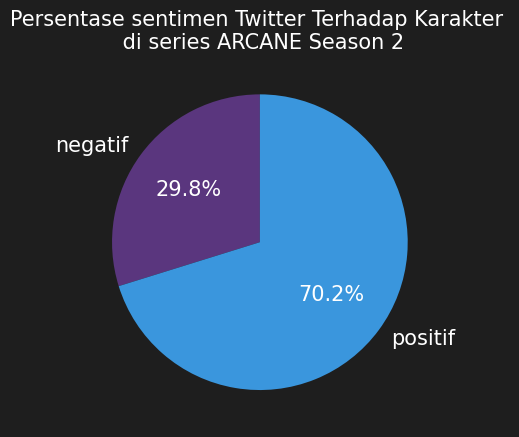

In [79]:
#Import Library
import matplotlib.pyplot as plt

# Data
labels = ['negatif', 'positif']
sizes = [neg, pos]
colors = ['#5A367E', '#3A96DD', '#']


# Membuat pie chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 15, 'color': 'white'})

# Menambahkan warna latar belakang seluruh canvas
plt.gcf().set_facecolor('#1E1E1E')  # Area di luar plot (misalnya lebih gelap)

# Judul Pie Chart
plt.title('Persentase sentimen Twitter Terhadap Karakter \n di series ARCANE Season 2', fontsize=15, color= 'white')

# Menampilkan Pie Chart
plt.axis()
plt.show()

In [171]:
import plotly.graph_objects as go

# Data
labels = ['negatif', 'positif']
sizes = [neg, pos]
colors = ['#5A367E', '#3A96DD']

# Membuat Pie Chart interaktif menggunakan Plotly
fig = go.Figure(data=[go.Pie(
    labels=labels,          # Label kategori
    values=sizes,           # Nilai kategori
    marker=dict(colors=colors),  # Warna
    hoverinfo='label+percent',   # Menampilkan label dan persentase saat hover
    textinfo='label+percent',    # Menampilkan label dan persentase pada pie
    textfont=dict(size=15, color='white'),  # Menyesuaikan ukuran font dan warna teks
    hoverlabel=dict(
        font_size=40,      # Ukuran font saat hover
        font_color='white',  # Warna font saat hover
        bgcolor=colors  # Menggunakan warna masing-masing kategori sebagai background saat hover
    ),
)])

# Menambahkan judul dan latar belakang
fig.update_layout(
    title='Persentase sentimen Twitter Terhadap Karakter \n di series ARCANE Season 2',
    title_font=dict(size=15, color='white'),
    plot_bgcolor='#1E1E1E',  # Latar belakang plot
    paper_bgcolor='#1E1E1E',  # Latar belakang keseluruhan
    font=dict(color='white'),  # Warna font untuk label dan judul
)

# Menampilkan pie chart interaktif
fig.show()


#### **Wordcloud**

<function matplotlib.pyplot.show(close=None, block=None)>

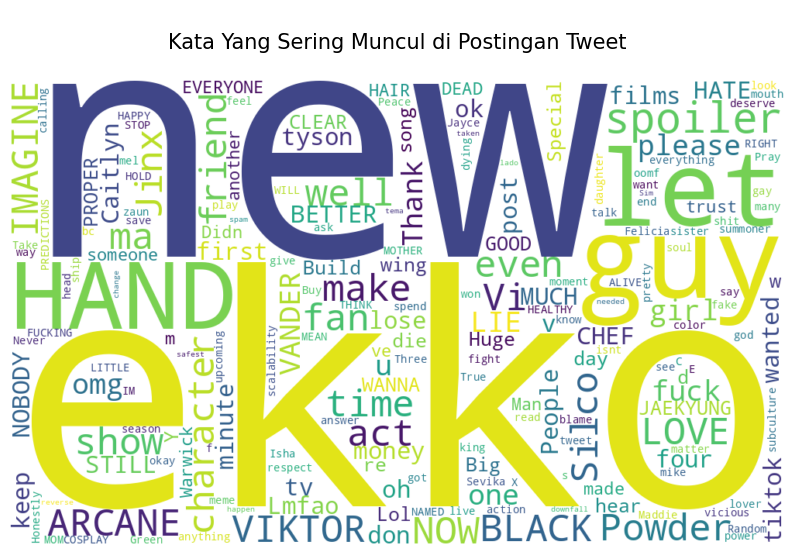

In [81]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_reviews = " ".join(review for review in df2['cleaning'])

# Remove duplicate words
all_reviews = " ".join(set(all_reviews.split()))


wordcloud= WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.title('\nKata Yang Sering Muncul di Postingan Tweet\n', fontsize=15)

plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')

plt.show

In [166]:
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Misalnya df2 adalah DataFrame yang sudah ada dan memiliki kolom 'cleaning' yang berisi teks
# Menggabungkan seluruh teks dalam kolom 'cleaning'
all_reviews = " ".join(review for review in df2['cleaning'])

# Menghapus kata yang duplikat
all_reviews = " ".join(set(all_reviews.split()))

# Membuat WordCloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Menyimpan WordCloud sebagai gambar sementara
wordcloud_image = wordcloud.to_array()

# Menampilkan gambar WordCloud menggunakan Plotly
fig = go.Figure(go.Image(z=wordcloud_image))

# Menambahkan interaktivitas
fig.update_layout(
    title="WordCloud Interaktif - Kata yang Sering Muncul",
    xaxis_visible=False,
    yaxis_visible=False,
    autosize=True
)

# Menampilkan plot interaktif
fig.show()


#### **Melihat Komentar dengan like terbanyak**

In [ ]:
def cleaning(text):
    # Fungsi untuk merapikan spasi
    text = re.sub(r'\s+', ' ', text).strip()    # Menghapus spasi ganda dan merapikan spasi
    return text

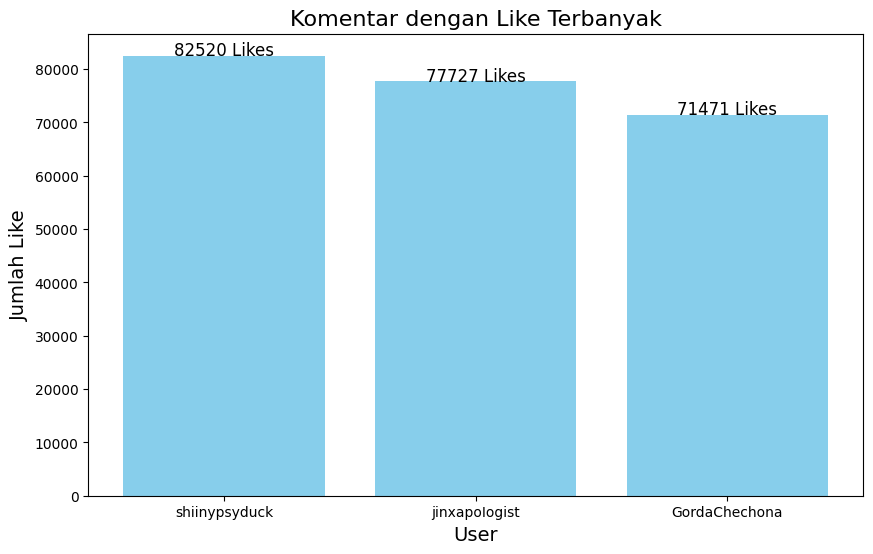

In [85]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data tabel komentar dari dataframe df2
data = df2

# Terapkan fungsi 'cleaning' ke kolom 'textDisplay'
data['cleaned_text'] = data['full_text'].apply(cleaning)

# Mengurutkan data berdasarkan jumlah like
data_sorted = data.nlargest(3, 'favorite_count')

# Mendapatkan data untuk visualisasi
users = data_sorted['username']
likes = data_sorted['favorite_count']
comments = data_sorted['full_text']

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(users, likes, color='skyblue')

# Menambahkan judul dan label
plt.title('Komentar dengan Like Terbanyak', fontsize=16)
plt.xlabel('User', fontsize=14)
plt.ylabel('Jumlah Like', fontsize=14)

# Menambahkan teks komentar di atas batang
for i, comment in enumerate(comments):
    plt.text(i, likes.iloc[i] + 1, f'{likes.iloc[i]} Likes', ha='center', fontsize=12)

# Simpan grafik sebagai file PNG
plt.savefig('top_comments_likes.png', format='png', dpi=300, bbox_inches='tight')

# Tampilkan grafik
plt.show()


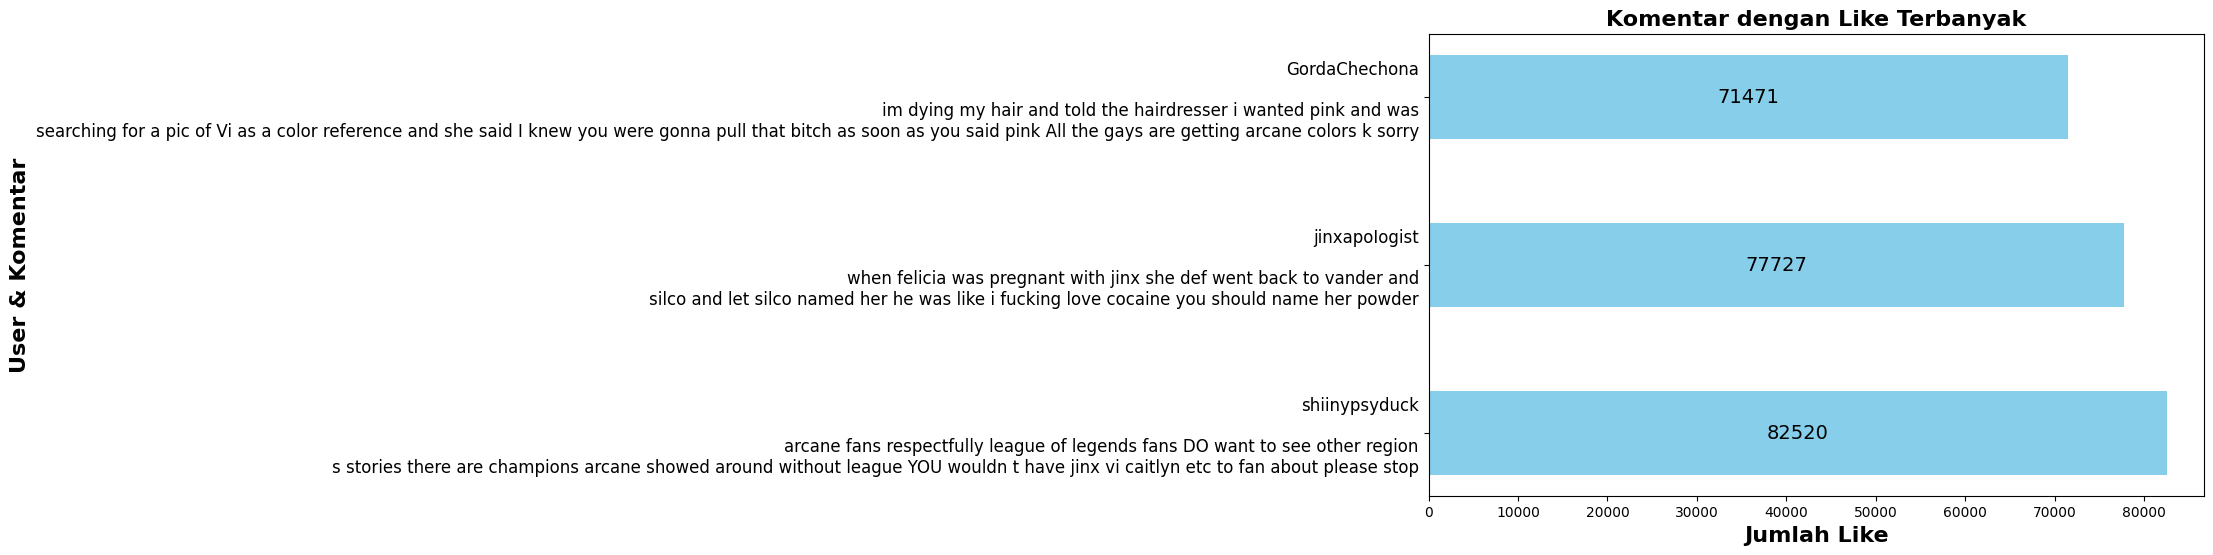

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari dataframe df2
data = df2

# Terapkan fungsi 'cleaning' ke kolom 'textDisplay' jika diperlukan
data['cleaned_text'] = data['full_text'].apply(cleaning)

# Mengurutkan data berdasarkan jumlah like
data_sorted = data.nlargest(3, 'favorite_count')

# Mendapatkan data untuk visualisasi
users = data_sorted['username']  # Nama pengguna
komentar = data_sorted['cleaned_text']     # Menggunakan teks yang sudah dibersihkan
likes = data_sorted['favorite_count']

# Fungsi untuk membatasi panjang komentar menjadi 2 baris jika lebih dari 10 kata
def format_comment(comment):
    words = comment.split()
    if len(words) > 13:
        return " ".join(words[:13]) + "\n" + " ".join(words[13:])
    else:
        return comment

# Format komentar
formatted_comments = [format_comment(comment) for comment in komentar]

# Gabungkan user dan komentar untuk ditampilkan dengan spasi tambahan
combined_text = [f"{user}\n\n{formatted_comment}" for user, formatted_comment in zip(users, formatted_comments)]

# Membuat grafik batang dengan ukuran batang lebih kecil
plt.figure(figsize=(10, 6))
bars = plt.barh(combined_text, likes, color='skyblue', height=0.5)  # Ukuran batang yang lebih kecil

# Menambahkan judul dan label dengan ukuran font yang lebih besar
plt.title('Komentar dengan Like Terbanyak', fontsize=16, fontweight="bold")
plt.xlabel('Jumlah Like', fontsize=16, fontweight="bold")
plt.ylabel('User & Komentar', fontsize=16, fontweight="bold")

# Menambahkan jumlah like di dalam batang dengan ukuran font yang lebih besar
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{int(width)}',
             ha='center', va='center', color='black', fontsize=14)  # Ukuran font lebih besar

# Menyesuaikan ukuran font sumbu y untuk user dan komentar
plt.yticks(fontsize=12)  # Mengatur ukuran font untuk sumbu y

# Simpan grafik sebagai file PNG
plt.savefig('top_comments_likes.png', format='png', dpi=300, bbox_inches='tight')

# Tampilkan grafik
plt.show()


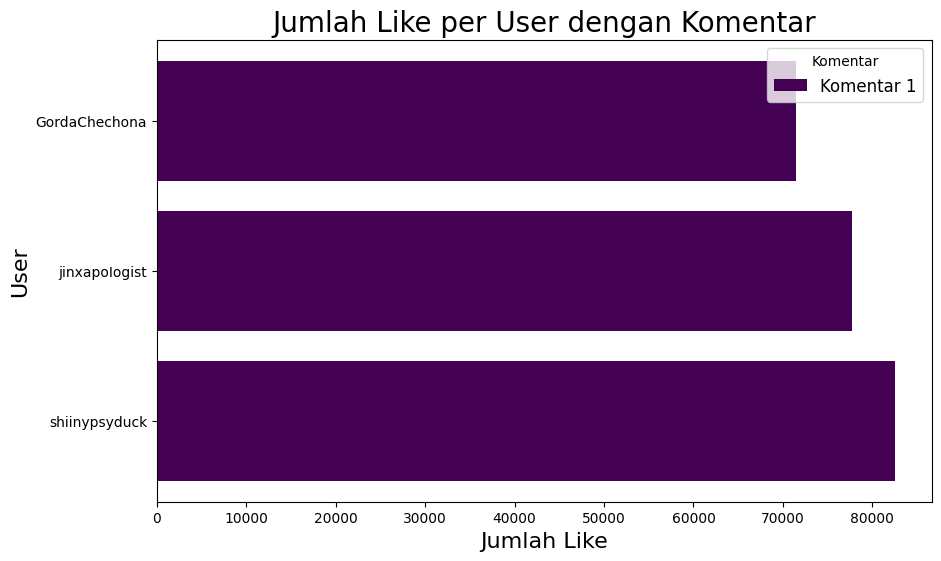

In [86]:
import numpy as np

# Menyusun data untuk horizontal stacked bar chart
unique_users = data_sorted['username'].unique()
num_users = len(unique_users)

# Buat warna yang berbeda untuk setiap komentar
colors = plt.cm.viridis(np.linspace(0, 1, num_users))

# Menyiapkan data untuk ditampilkan dalam format stacked
stacked_likes = []
for user in unique_users:
    user_likes = data_sorted[data_sorted['username'] == user]['favorite_count'].values
    stacked_likes.append(user_likes)

# Menyusun data menjadi array numpy
stacked_likes = np.array(stacked_likes)

# Membuat grafik horizontal stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.5

# Plotkan setiap komentar sebagai bagian yang terpisah
for i in range(stacked_likes.shape[1]):
    plt.barh(unique_users, stacked_likes[:, i], left=stacked_likes[:, :i].sum(axis=1), color=colors[i], label=f'Komentar {i + 1}')

# Menambahkan label dan judul
plt.xlabel('Jumlah Like', fontsize=16)
plt.ylabel('User', fontsize=16)
plt.title('Jumlah Like per User dengan Komentar', fontsize=20)
plt.legend(title='Komentar', fontsize=12)

# Simpan grafik sebagai file PNG
plt.savefig('top_comments_likes_stacked.png', format='png', dpi=300, bbox_inches='tight')

# Tampilkan grafik
plt.show()


####**Clustering**

In [115]:
# Clustering
df3=df2.drop(['full_text',	'lang', 'username',
              'remove_user',	'cleaning',	'tokenized_Content',
              'Label'], axis=1)
df3=df3.dropna()
df3.head()

favorite_count  quote_count  reply_count  retweet_count
0               9          0.0          2.0            1.0
1              74          0.0          4.0            2.0
2            1012          1.0         14.0           68.0
3              23          0.0          3.0            5.0
4              93          6.0          3.0           17.0

In [116]:
# Importing Standardscalar Module
from sklearn.preprocessing import StandardScaler
# Set Name for StandardScaler as scaler
scaler = StandardScaler()
# Fit Standardization
column_names = df3.columns.tolist()
df3[column_names] = scaler.fit_transform(df3[column_names])
df3.sort_index(inplace=True)
df3

favorite_count  quote_count  reply_count  retweet_count
0         -0.247135    -0.173849    -0.200253      -0.237721
1         -0.241055    -0.173849    -0.175048      -0.236730
2         -0.153322    -0.167545    -0.049025      -0.171329
3         -0.245825    -0.173849    -0.187651      -0.233757
4         -0.239278    -0.136024    -0.187651      -0.221866
..              ...          ...          ...            ...
250       -0.161553    -0.142328    -0.086832      -0.182229
251       -0.237407    -0.173849    -0.212855      -0.232766
252       -0.139386    -0.161241    -0.175048      -0.106919
253        1.423997     0.053104     0.266032       0.338997
254       -0.244796    -0.167545     0.051793      -0.234748

[255 rows x 4 columns]

Text(0, 0.5, 'Retweet')

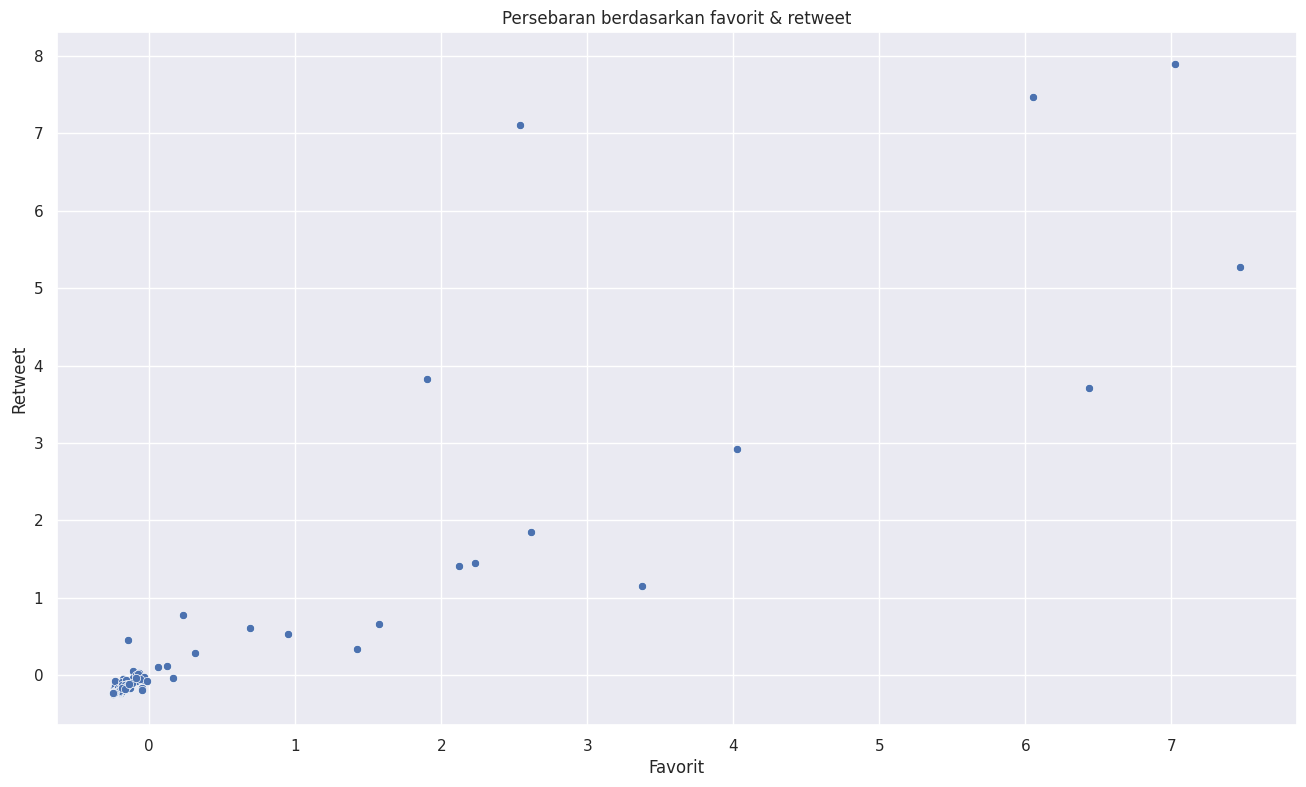

In [119]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Styling Plot
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)
# Visualizing the Data
sns.scatterplot(x='favorite_count', y='retweet_count', data=df3)
plt.title('Persebaran berdasarkan favorit & retweet')
plt.xlabel('Favorit')
plt.ylabel('Retweet')

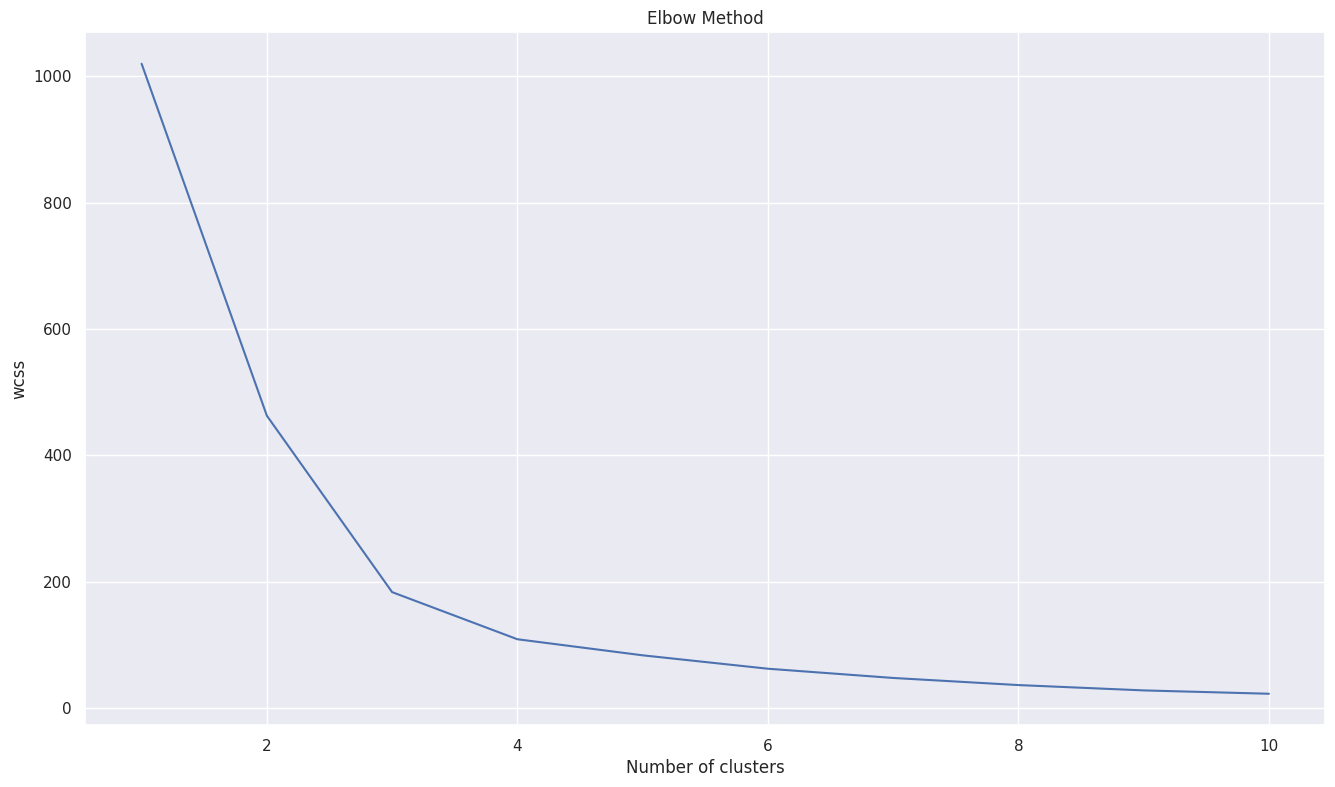

In [121]:
# Transform Data Frame to Numpy Array
income = df3.to_numpy()
income
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
                  random_state=0)
  kmeans.fit(income)
  wcss.append(kmeans.inertia_)
# Visualize
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [122]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters=n_cluster).fit(income)
label = kmeans.labels_
sil_coeff = silhouette_score(income, label, metric='euclidean')
print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster,
sil_coeff))

For n_clusters=10, The Silhouette Coefficient is 0.8242580858592888


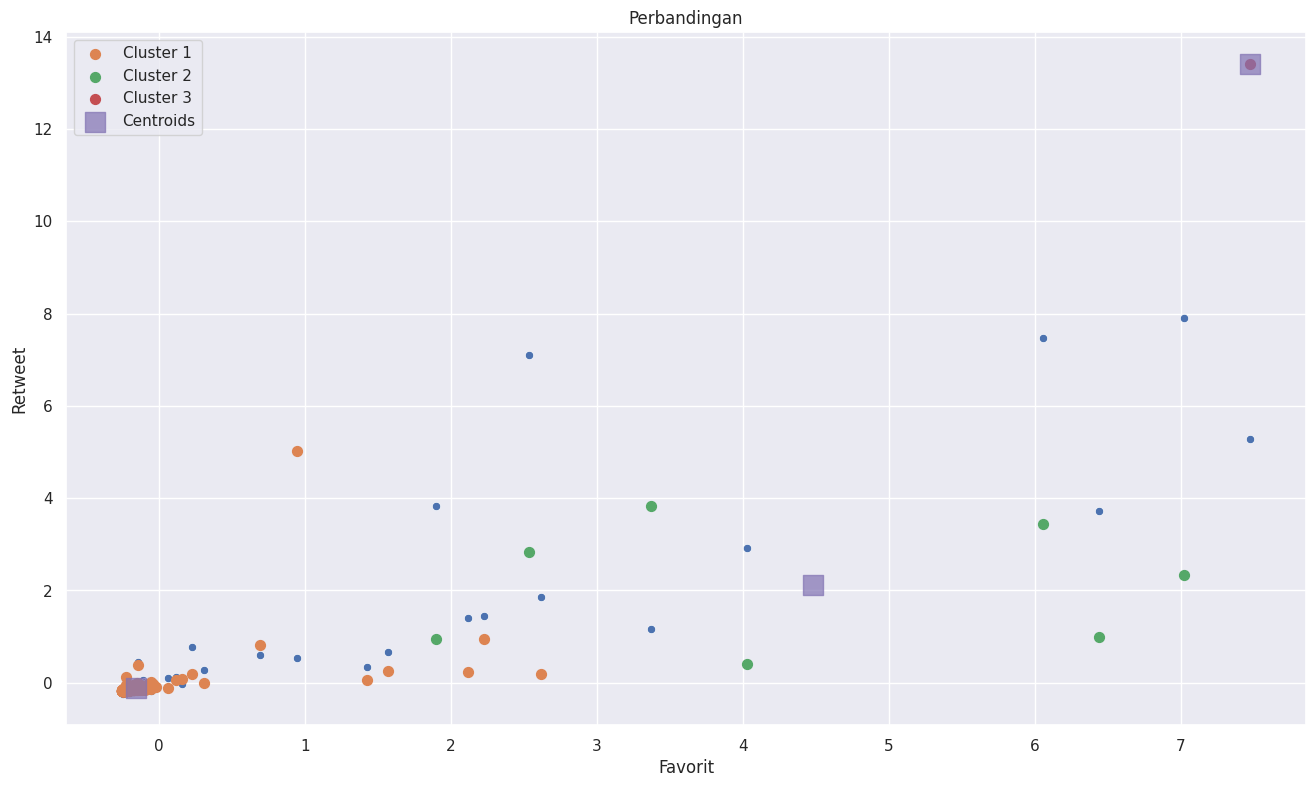

In [124]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)
# Visualising Clusters for k=3
sns.scatterplot(x='favorite_count', y='retweet_count', data=df3)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label =
'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label =
'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label =
'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7,
label='Centroids')
plt.title('Perbandingan')
plt.xlabel('Favorit')
plt.ylabel('Retweet')
plt.legend()
plt.show()

In [126]:
# Add Cluster Information to the Raw Data
df3['cluster'] = cluster
df3

favorite_count  quote_count  reply_count  retweet_count  cluster
0         -0.247135    -0.173849    -0.200253      -0.237721        0
1         -0.241055    -0.173849    -0.175048      -0.236730        0
2         -0.153322    -0.167545    -0.049025      -0.171329        0
3         -0.245825    -0.173849    -0.187651      -0.233757        0
4         -0.239278    -0.136024    -0.187651      -0.221866        0
..              ...          ...          ...            ...      ...
250       -0.161553    -0.142328    -0.086832      -0.182229        0
251       -0.237407    -0.173849    -0.212855      -0.232766        0
252       -0.139386    -0.161241    -0.175048      -0.106919        0
253        1.423997     0.053104     0.266032       0.338997        0
254       -0.244796    -0.167545     0.051793      -0.234748        0

[255 rows x 5 columns]

#### **Decision Tree**

In [172]:
# Import Data to Google Colab
df_tree=pd.read_csv('/content/ArcaneS2_Cleaned+Label.csv', sep = ',')
# Show 10 first Row
df_tree.head()

favorite_count                                          full_text lang  \
0               9  jinx purposely not aiming at ekko.. i love you...   en   
1              74                 I should've treated Jinx better...   en   
2            1012                        Is it even worth it anymore   en   
3              23                                        i love jinx   en   
4              93  I m the biggest Jinx apologist online idc she ...   en   

   quote_count  reply_count  retweet_count         username  \
0          0.0          2.0            1.0    leaveinrunins   
1          0.0          4.0            2.0  orange_enforcer   
2          1.0         14.0           68.0       jinxphobia   
3          0.0          3.0            5.0     shadowofzaun   
4          6.0          3.0           17.0   kartoplya_arts   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1                 I should've treated Jinx better...   
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1                   I should ve treated Jinx better    
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                   tokenized_Content    Label  
0  ['"jinx"', '"purposely"', '"not"', '"aiming"',...  positif  
1  ['"I"', '"should"', '"\'ve"', '"treated"', '"J...  positif  
2  ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...  positif  
3                        ['"i"', '"love"', '"jinx"']  positif  
4  ['"I"', '"m"', '"the"', '"biggest"', '"Jinx"',...  positif

In [173]:
# Replace Churn Values
df_tree['Label'].replace(['negatif', 'positif'], [0,1], inplace=True)
# Show Data
df_tree.head(3)

favorite_count                                          full_text lang  \
0               9  jinx purposely not aiming at ekko.. i love you...   en   
1              74                 I should've treated Jinx better...   en   
2            1012                        Is it even worth it anymore   en   

   quote_count  reply_count  retweet_count         username  \
0          0.0          2.0            1.0    leaveinrunins   
1          0.0          4.0            2.0  orange_enforcer   
2          1.0         14.0           68.0       jinxphobia   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1                 I should've treated Jinx better...   
2                        Is it even worth it anymore   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1                   I should ve treated Jinx better    
2                        Is it even worth it anymore   

                                   tokenized_Content  Label  
0  ['"jinx"', '"purposely"', '"not"', '"aiming"',...      1  
1  ['"I"', '"should"', '"\'ve"', '"treated"', '"J...      1  
2  ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...      1

In [174]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler
# Initizalize Standard Scaler
standard_scaler = StandardScaler()
df_stand = df_tree.copy()
# Transform all attributes
df_stand[column_names] = standard_scaler.fit_transform(df_stand[column_names])
df_stand.sort_index(inplace=True)
df_stand.head()

favorite_count                                          full_text lang  \
0       -0.247135  jinx purposely not aiming at ekko.. i love you...   en   
1       -0.241055                 I should've treated Jinx better...   en   
2       -0.153322                        Is it even worth it anymore   en   
3       -0.245825                                        i love jinx   en   
4       -0.239278  I m the biggest Jinx apologist online idc she ...   en   

   quote_count  reply_count  retweet_count         username  \
0    -0.173849    -0.200253      -0.237721    leaveinrunins   
1    -0.173849    -0.175048      -0.236730  orange_enforcer   
2    -0.167545    -0.049025      -0.171329       jinxphobia   
3    -0.173849    -0.187651      -0.233757     shadowofzaun   
4    -0.136024    -0.187651      -0.221866   kartoplya_arts   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1                 I should've treated Jinx better...   
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1                   I should ve treated Jinx better    
2                        Is it even worth it anymore   
3                                        i love jinx   
4  I m the biggest Jinx apologist online idc she ...   

                                   tokenized_Content  Label  
0  ['"jinx"', '"purposely"', '"not"', '"aiming"',...      1  
1  ['"I"', '"should"', '"\'ve"', '"treated"', '"J...      1  
2  ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...      1  
3                        ['"i"', '"love"', '"jinx"']      1  
4  ['"I"', '"m"', '"the"', '"biggest"', '"Jinx"',...      1

In [175]:
feature = df_stand.drop(['full_text',	'lang', 'username',	'remove_user',	'cleaning',	'tokenized_Content'], axis=1)
feature

favorite_count  quote_count  reply_count  retweet_count  Label
0         -0.247135    -0.173849    -0.200253      -0.237721      1
1         -0.241055    -0.173849    -0.175048      -0.236730      1
2         -0.153322    -0.167545    -0.049025      -0.171329      1
3         -0.245825    -0.173849    -0.187651      -0.233757      1
4         -0.239278    -0.136024    -0.187651      -0.221866      1
..              ...          ...          ...            ...    ...
250       -0.161553    -0.142328    -0.086832      -0.182229      0
251       -0.237407    -0.173849    -0.212855      -0.232766      0
252       -0.139386    -0.161241    -0.175048      -0.106919      0
253        1.423997     0.053104     0.266032       0.338997      1
254       -0.244796    -0.167545     0.051793      -0.234748      1

[255 rows x 5 columns]

In [181]:
# Select Target
target = df_stand['Label']
target

0      1
1      1
2      1
3      1
4      1
      ..
250    0
251    0
252    0
253    1
254    1
Name: Label, Length: 255, dtype: int64

In [182]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle
= True, test_size=0.3, random_state=1)
# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(178, 5)
(77, 5)
(178,)
(77,)


In [183]:
# Import Module
from sklearn import tree
# Modeling Decision Tree

In [184]:
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)
# Predict to Test Data
y_pred_dtc = dtc.predict(X_test)

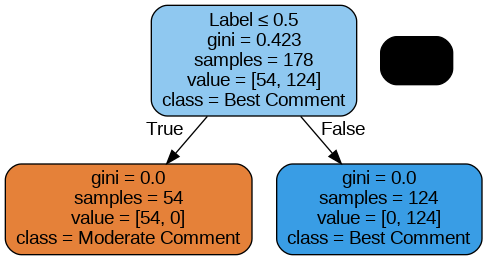

In [185]:
# Visualize Tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                class_names=['Moderate Comment', 'Best Comment'],
                feature_names=['favorite_count',	'quote_count',	'reply_count',	'retweet_count',	'Label'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [189]:
# Import Module
from sklearn import metrics
# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[22,  0],
       [ 0, 55]])

In [190]:
from sklearn import metrics

# Calculate metrics with multiclass handling
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc, average='weighted')  # Specify 'micro', 'macro', or 'weighted'
rec_dtc = metrics.recall_score(y_test, y_pred_dtc, average='weighted')      # Specify 'micro', 'macro', or 'weighted'
f1_dtc = metrics.f1_score(y_test, y_pred_dtc, average='weighted')           # Specify 'micro', 'macro', or 'weighted'
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

# Print the results
print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohen's Kappa:", kappa_dtc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohen's Kappa: 1.0


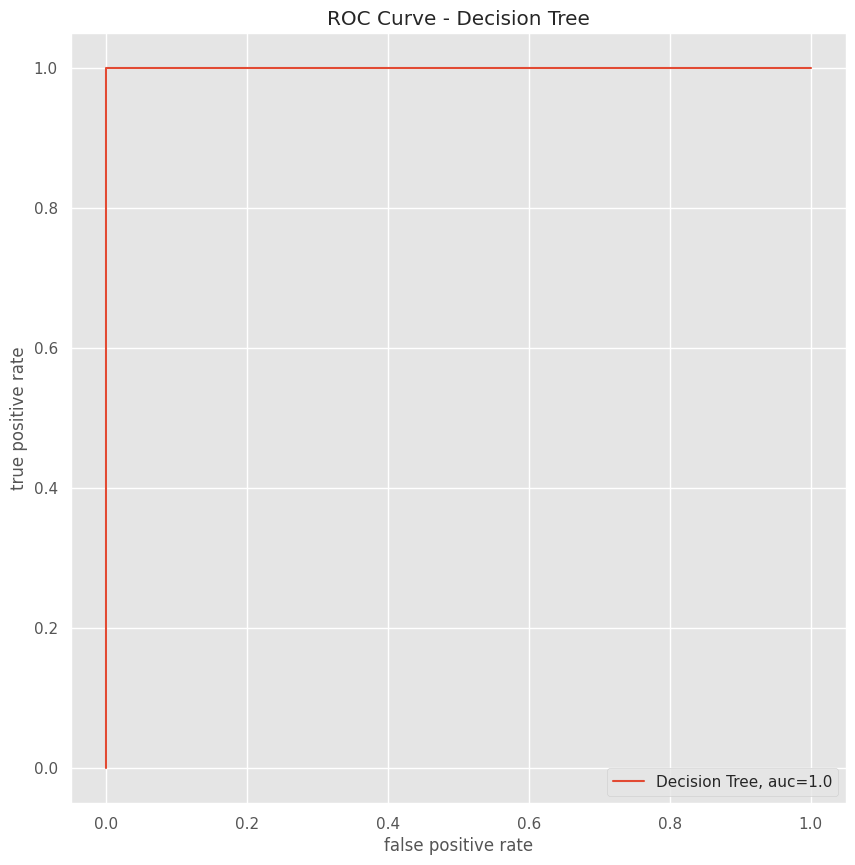

In [188]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')
# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test, y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### **Scattering**

In [150]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data to Google Colab
dfreg=pd.read_csv('/content/ArcaneS2_Cleaned+Label.csv', sep = ',')
# Show 10 first Row
dfreg.head(3)

favorite_count                                          full_text lang  \
0               9  jinx purposely not aiming at ekko.. i love you...   en   
1              74                 I should've treated Jinx better...   en   
2            1012                        Is it even worth it anymore   en   

   quote_count  reply_count  retweet_count         username  \
0          0.0          2.0            1.0    leaveinrunins   
1          0.0          4.0            2.0  orange_enforcer   
2          1.0         14.0           68.0       jinxphobia   

                                         remove_user  \
0  jinx purposely not aiming at ekko.. i love you...   
1                 I should've treated Jinx better...   
2                        Is it even worth it anymore   

                                            cleaning  \
0  jinx purposely not aiming at ekko i love you s...   
1                   I should ve treated Jinx better    
2                        Is it even worth it anymore   

                                   tokenized_Content    Label  
0  ['"jinx"', '"purposely"', '"not"', '"aiming"',...  positif  
1  ['"I"', '"should"', '"\'ve"', '"treated"', '"J...  positif  
2  ['"Is"', '"it"', '"even"', '"worth"', '"it"', ...  positif

In [165]:
import plotly.express as px

# Membuat scatter plot interaktif
fig = px.scatter(dfreg,
                 x='favorite_count',  # Sumbu X (jumlah like)
                 y='retweet_count',   # Sumbu Y (jumlah retweet)
                 color='Label',       # Warna berdasarkan kolom 'Label' (kategori)
                 size='favorite_count',  # Ukuran titik berdasarkan jumlah like
                 hover_name='Label',  # Menampilkan 'Label' saat mengarahkan kursor ke titik
                 hover_data={'username': True},  # Menampilkan kolom 'username' saat hover
                 title='Scatter Plot Interaktif antara Like dan Retweet',  # Judul plot
                 labels={'favorite_count': 'Jumlah Like', 'retweet_count': 'Jumlah Retweet'}  # Label sumbu

)

# Menampilkan plot interaktif
fig.show()

# **LANJUTAN**

In [ ]:
import pandas as pd

# Membaca data tabel komentar dari file CSV
data = df2

# Menghitung jumlah tag untuk setiap nama
tag_counts = data['authorDisplayName'].value_counts()

# Menampilkan nama yang paling banyak di-tag
most_tagged = tag_counts.idxmax()
top_three_tagged = tag_counts.nlargest(3)

print("Tiga orang yang paling banyak di-tag:\n")
print(top_three_tagged)

NameError: name 'df2' is not defined

In [ ]:
import pandas as pd

# Membaca data tabel komentar dari file CSV
data = df2

data[''] = data['textDisplay'].apply(cleaning)

# Mengurutkan data berdasarkan jumlah like
data_sorted = data.nlargest(3, 'likeCount')
print('Komentar dengan like terbanyak\n')
# Menampilkan tiga komentar dengan like terbanyak
for index, row in data_sorted.iterrows():
    user = row['authorDisplayName']
    komentar = row['textDisplay']
    jumlah_like = row['likeCount']
    print('<><><><><><><><><><>')
    print()
    print('User:', user)
    print()
    print("Komentar:", komentar)
    print()
    print("Jumlah Like:", jumlah_like)
    print()
    print("--------------------")

Komentar dengan like terbanyak

<><><><><><><><><><>

User: @volcyr8721

Komentar: 17sec scream  'this is what you asked for '  shivers been sent.

Jumlah Like: 13535

--------------------
<><><><><><><><><><>

User: @Valle

Komentar: 2 Songs - 2 absolute bangers. Gotta love it..

Jumlah Like: 10879

--------------------
<><><><><><><><><><>

User: @andrekenjisouza

Komentar: I 'm really impressed by how this sounds Linkin Park in every way.   It 's almost a mist of Meteora / Living Things / THP.

Jumlah Like: 5276

--------------------


In [ ]:
import pandas as pd
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton, QTextEdit

# Dummy data untuk simulasi
data = pd.DataFrame({
    'authorDisplayName': ['User1', 'User2', 'User3', 'User4'],
    'textDisplay': ['Komentar pertama', 'Komentar kedua', 'Komentar ketiga', 'Komentar keempat'],
    'likeCount': [10, 50, 20, 30]
})

class KomentarApp(QWidget):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setWindowTitle('Komentar Terbanyak')

        # Layout utama
        layout = QVBoxLayout()

        # Tombol untuk menampilkan komentar
        self.btn = QPushButton('Tampilkan Komentar Terbanyak', self)
        self.btn.clicked.connect(self.tampilkan_komentar)

        # Text area untuk menampilkan komentar
        self.text_area = QTextEdit(self)
        self.text_area.setReadOnly(True)

        layout.addWidget(self.btn)
        layout.addWidget(self.text_area)

        self.setLayout(layout)

    def tampilkan_komentar(self):
        # Mengurutkan data berdasarkan jumlah like
        data_sorted = data.nlargest(3, 'likeCount')

        # Menampilkan komentar pada text area
        self.text_area.clear()
        for index, row in data_sorted.iterrows():
            user = row['authorDisplayName']
            komentar = row['textDisplay']
            jumlah_like = row['likeCount']
            self.text_area.append(f"User: {user}")
            self.text_area.append(f"Komentar: {komentar}")
            self.text_area.append(f"Jumlah Like: {jumlah_like}")
            self.text_area.append("--------------------")

if __name__ == '__main__':
    import sys
    app = QApplication(sys.argv)
    ex = KomentarApp()
    ex.show()
    sys.exit(app.exec_())
